In [1]:
import pandas as pd

# Read a CSV file with semicolon delimiter
df = pd.read_csv('HasilPreProcess.csv', delimiter=',')

# Display the first five rows of the DataFrame
df = pd.DataFrame(df)
df

,Unnamed: 0,id,date,username,latitude,longitude,final_tweet
0,0,1387917769501515778,2021-04-29 23:52:37+00:00,MaseebAkhter,24.972077,67.064381,rd jumma mubarak
1,2,1387914934533513220,2021-04-29 23:41:21+00:00,PolsekPlaju3,-3.190822,104.794609,lawan covid sinergitas tni polri cegah tular c...
2,3,1387913431865610244,2021-04-29 23:35:22+00:00,irfania_real,31.315389,74.222395,jummah mubarak
3,4,1387911958393987075,2021-04-29 23:29:31+00:00,kenny_thok,-2.455096,111.930698,semangat ya neng isolasi pakai sek pondok deri...
4,5,1387907774441566213,2021-04-29 23:12:54+00:00,kejarirohul,0.902542,100.308263,kamis tanggal april kepala seksi intelijen ari...
...,...,...,...,...,...,...,...
8109,9332,1536673294782709760,2022-06-14 11:33:58+00:00,StellaSuwardi,-6.297602,106.770437,vaksinasi booster tingkat imunitas varian omic...
8110,9333,1536525461077262336,2022-06-14 01:46:31+00:00,natasya_puspa4,-6.364100,106.799599,jokowi menteri waspada hati hati varian omicro...
8111,9335,1536515216665899013,2022-06-14 01:05:49+00:00,Agistasyahka,-6.301652,106.974561,sebar virus omicron ba ba cepat banding varian...
8112,9336,1536358141377384448,2022-06-13 14:41:39+00:00,Ardi_Wdyto,-7.776581,113.198255,varian omicron


In [2]:
dftwit = df.drop(['Unnamed: 0','id','date','username','latitude','longitude'], axis =1)
dftwit

,final_tweet
0,rd jumma mubarak
1,lawan covid sinergitas tni polri cegah tular c...
2,jummah mubarak
3,semangat ya neng isolasi pakai sek pondok deri...
4,kamis tanggal april kepala seksi intelijen ari...
...,...
8109,vaksinasi booster tingkat imunitas varian omic...
8110,jokowi menteri waspada hati hati varian omicro...
8111,sebar virus omicron ba ba cepat banding varian...
8112,varian omicron


In [3]:
dftwit.index += 1
dftwit

,final_tweet
1,rd jumma mubarak
2,lawan covid sinergitas tni polri cegah tular c...
3,jummah mubarak
4,semangat ya neng isolasi pakai sek pondok deri...
5,kamis tanggal april kepala seksi intelijen ari...
...,...
8110,vaksinasi booster tingkat imunitas varian omic...
8111,jokowi menteri waspada hati hati varian omicro...
8112,sebar virus omicron ba ba cepat banding varian...
8113,varian omicron


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ambil kolom teks
corpus = dftwit['final_tweet']

# # Kata yang ingin Anda jadikan fitur
selected_word = ['covid','sars-cov-2','corona','batuk','batuk kering','pilek','kelelahan','sakit kepala',
                 'demam','sesak nafas','omicron','delta','tenggorokan','anosmia','diare']

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung tf-idf dari corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus.astype('U').values)

# Mendapatkan daftar kata yang digunakan sebagai fitur
feature_names = tfidf_vectorizer.get_feature_names_out()

# Hasil dalam bentuk DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Gabungkan dengan data awal jika perlu
result = pd.concat([corpus, tfidf_df], axis=1)

# Tampilkan hasilnya
print(result)

                                            final_tweet   aa  aaa  aaah  \
1                                      rd jumma mubarak  0.0  0.0   0.0   
2     lawan covid sinergitas tni polri cegah tular c...  0.0  0.0   0.0   
3                                        jummah mubarak  0.0  0.0   0.0   
4     semangat ya neng isolasi pakai sek pondok deri...  0.0  0.0   0.0   
5     kamis tanggal april kepala seksi intelijen ari...  0.0  0.0   0.0   
...                                                 ...  ...  ...   ...   
8111  jokowi menteri waspada hati hati varian omicro...  0.0  0.0   0.0   
8112  sebar virus omicron ba ba cepat banding varian...  0.0  0.0   0.0   
8113                                     varian omicron  0.0  0.0   0.0   
8114  breaking news omicron ba ba resmi deteksi indo...  NaN  NaN   NaN   
0                                                   NaN  0.0  0.0   0.0   

      aadmi  aaduuhh  aafiyah  aag  aah  aahe  ...  zubairi  zublihl  \
1       0.0      0.0      0

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import numpy as np

# Konversi matriks TF-IDF menjadi matriks dense
dense_tfidf_matrix = tfidf_matrix.toarray()
euclidean_distances = pairwise_distances(dense_tfidf_matrix, dense_tfidf_matrix, metric='euclidean')

print("Matriks Jarak Euclidean:")
print(euclidean_distances)

Matriks Jarak Euclidean:
[[0.         1.41421356 1.11567216 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 0.         1.41421356 ... 1.41421356 1.41421356 1.37729559]
 [1.11567216 1.41421356 0.         ... 1.41421356 1.41421356 1.41421356]
 ...
 [1.41421356 1.41421356 1.41421356 ... 0.         1.17377744 1.06780093]
 [1.41421356 1.41421356 1.41421356 ... 1.17377744 0.         1.22930862]
 [1.41421356 1.37729559 1.41421356 ... 1.06780093 1.22930862 0.        ]]


In [6]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Inisialisasi model OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Fit model ke data TF-IDF
optics.fit(euclidean_distances)

labels = optics.labels_
core_samples = optics.core_sample_indices_
reachability = optics.reachability_

# Contoh mencetak label cluster
print(labels)

# Visualisasi reachability plot
plt.figure(figsize=(10, 5))
plt.plot(reachability[core_samples], 'o', markersize=5)
plt.title('Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()

KeyboardInterrupt: 

In [22]:
# Inisialisasi kolom yang akan diproses
list_features = ['covid', 'sars-cov-2', 'corona', 'batuk', 'batuk kering',
       'pilek', 'kelelahan', 'sakit kepala', 'demam', 'sesak nafas', 'omicron',
       'delta', 'tenggorokan', 'anosmia', 'diare']
f_data = dftwit[list_features]

# PCA merupakan reduksi fitur
# Disini hanya berfungsi agar mudah untuk dilakukan visualisasi menggunakan scatter plot
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(f_data)

KeyError: "None of [Index(['covid', 'sars-cov-2', 'corona', 'batuk', 'batuk kering', 'pilek',\n       'kelelahan', 'sakit kepala', 'demam', 'sesak nafas', 'omicron', 'delta',\n       'tenggorokan', 'anosmia', 'diare'],\n      dtype='object')] are in the [columns]"

In [20]:
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Buat data contoh
np.random.seed(0)
X = np.random.rand(100, 2)

# Buat objek OPTICS dengan parameter yang sesuai
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# Lakukan clustering pada data
clustering.fit(X_pca)

# Ambil reachability distances dari hasil clustering
reachability = clustering.reachability_

# Plot reachability plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(reachability)), reachability, marker='o')
plt.title('Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()

NameError: name 'X_pca' is not defined

In [17]:
from sklearn.cluster import OPTICS
from sklearn import datasets
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Fit the OPTICS model
clustering = OPTICS(min_samples=20, xi=.05, min_cluster_size=.05)
clustering.fit(X)

# Extract the clusters
labels = clustering.labels_

# Print the cluster labels
print("Cluster Labels:", labels)


ImportError: cannot import name '_contents' from 'sklearn.utils.fixes' (C:\Users\fahmy\.conda\envs\skripsitwit\lib\site-packages\sklearn\utils\fixes.py)

In [10]:
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Create an HDBSCAN instance
hdbscan = HDBSCAN(min_samples=5, min_cluster_size=5, metric='precomputed')

# Fit the model to your similarity matrix
hdbscan.fit(tfidf_matrix)

labels = hdbscan.labels_
core_samples_mask = np.zeros_like(hdbscan.labels_, dtype=bool)
core_samples_mask[hdbscan.exemplars_] = True

# Print cluster labels
print(labels)

# Visualize the cluster assignments
plt.scatter(data_points, labels)
plt.title('Cluster Assignments')
plt.xlabel('Data Points')
plt.ylabel('Cluster Labels')
plt.show()

ValueError: compressed-sparse graph must be shape (N, N)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import OPTICS

# Clustering dengan OPTICS
optics_cluster = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05, metric='cosine')
optics_cluster.fit(tfidf_matrix)

# Menambahkan label cluster ke dokumen
dftwit['cluster'] = optics_cluster.labels_

# Menampilkan hasil clustering
for cluster_id in set(optics_cluster.labels_):
    print(f"Cluster {cluster_id}:")
    cluster_docs = [dftwit.final_tweet[i] for i, label in enumerate(dftwit['cluster']) if label == cluster_id]
    print(f"Jumlah dokumen dalam cluster {cluster_id}: {len(cluster_docs)}")
    print(cluster_docs[:5])  # Tampilkan 5 dokumen pertama dalam setiap cluster


Cluster 0:


KeyError: 0

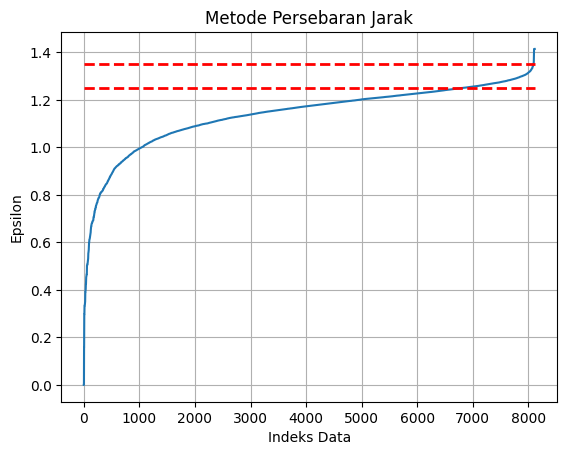

In [6]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Contoh data (asumsi data 2D)
data = tfidf_matrix

# Menghitung jarak ke K-tetangga terdekat
k = 5  # Jumlah tetangga terdekat yang akan dihitung
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data)
distances, indices = neigh.kneighbors(data)

# Menghitung jarak maksimum
distances = np.sort(distances, axis=0)
distances = distances[:, 2]  # Mengambil jarak ke tetangga ketiga

# Membuat plot untuk menentukan epsilon
plt.plot(distances)
plt.xlabel("Indeks Data")
plt.ylabel("Epsilon")
plt.title("Metode Persebaran Jarak")
plt.grid(True)
plt.hlines(y=[1.25,1.35], xmin=0, xmax=len(distances), color='red', linestyle='--', linewidth=2)
plt.show()